In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('sale_report_19_20.xls')
df.tail()

,DATE,BARCODE,PRODUCT NAME,IT group,BRAND,DESING,COLOR,SIZE,QTY.,RATE,DIS%,DIS. AMT.,SALE AMT.
9101,21/03/2020,190004457,L.BRA,L.BRA,SHERRY,777,ASTD,34,1.0,335,5.00,16.75,318.25
9102,21/03/2020,190007395,L.BRA,L.BRA,SHERRY,ELINA,ASTD,32,1.0,270,5.00,13.50,256.50
9103,21/03/2020,190006330,G.NIGHTSUIT,G.NIGHTSUIT,DFL,5548,ASTD,06,1.0,585,5.00,29.25,555.75
9104,21/03/2020,180004925,M.TRACKPANT,M.TRACKPANT,KANCHIRO,TRACK,ASTD,3XL-5XL,1.0,900,5.00,45.00,855.00
9105,21/03/2020,190011035,PERFUME,PERFUME,RAMSONS,EXOTICA,-,-,1.0,499,30.06,150.00,349.00


In [3]:
df.drop('DIS%', axis=1, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

DATE            0
BARCODE         0
PRODUCT NAME    0
IT group        0
BRAND           0
DESING          0
COLOR           0
SIZE            0
QTY.            0
RATE            0
DIS. AMT.       0
SALE AMT.       0
dtype: int64

In [4]:
df.shape

(9106, 12)

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%Y', infer_datetime_format=True, errors='coerce')

In [6]:
df['year'] = df.DATE.dt.year
df['month'] = df.DATE.dt.month
df['day'] = df.DATE.dt.day

In [7]:
item_type = []

for i in df['PRODUCT NAME']:
    if '.' not in i:
        item_type.append('other')
    else:
        split_val = i.split('.')[0]
        if split_val == 'M':
            item_type.append('male')
        elif split_val == 'L':
            item_type.append('female')
        elif split_val == 'B':
            item_type.append('boy')
        elif split_val == 'G':
            item_type.append('girl')
df['item_type'] = item_type

In [8]:
df.head()

,DATE,BARCODE,PRODUCT NAME,IT group,BRAND,DESING,COLOR,SIZE,QTY.,RATE,DIS. AMT.,SALE AMT.,year,month,day,item_type
0,2019-01-20,180003245,M.TSHIRT,M.TSHIRT,NEVA,VMC2000,ASTD,L,1.0,330,20.5,309.5,2019,1,20,male
1,2019-01-20,180004033,WALLET,WALLET,-,370,-,-,1.0,200,0.0,200.0,2019,1,20,other
2,2019-01-20,180003243,M.TSHIRT,M.TSHIRT,NEVA,VMC2000,ASTD,L,1.0,330,20.5,309.5,2019,1,20,male
3,2019-01-20,180002658,M.VEST,M.VEST,SAJANI,RN,ASTD,90,1.0,60,4.0,56.0,2019,1,20,male
4,2019-01-20,180002662,M.VEST,M.VEST,SAJANI,RN,ASTD,90,1.0,60,4.0,56.0,2019,1,20,male


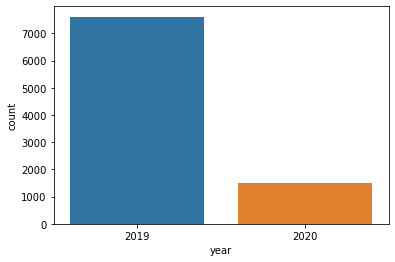

In [9]:
sns.countplot(x=df['year'], data=df)

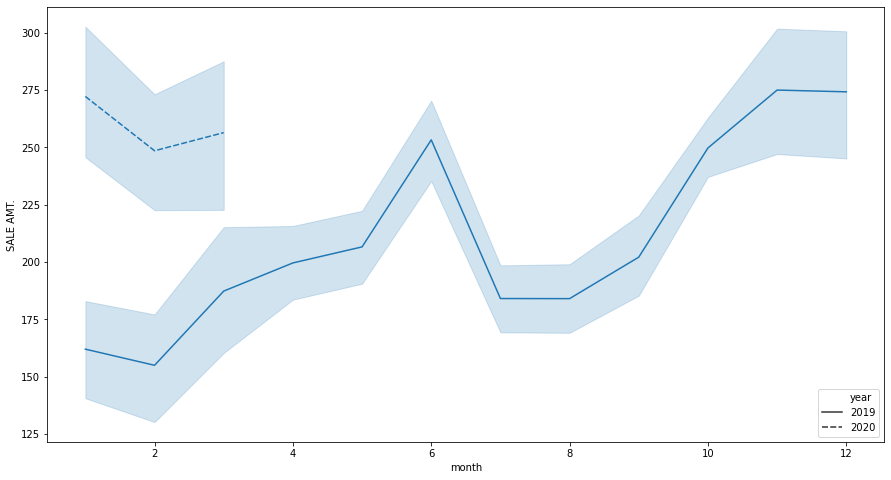

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(x="month", y="SALE AMT.",
             style='year',
             data=df)
plt.legend(loc='lower right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

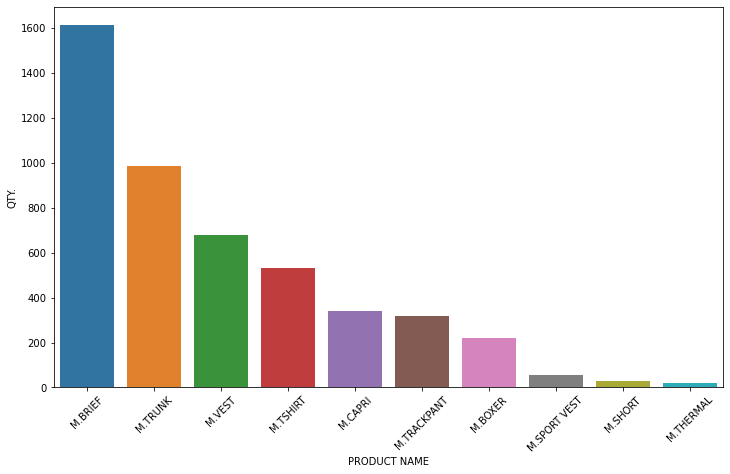

In [11]:
male_top_item_df = df[(df['item_type']=='male')]
male_top_item_df = male_top_item_df.groupby('PRODUCT NAME')[['QTY.','SALE AMT.']].sum().sort_values(by='QTY.',
                                                            ascending=False).head(10).reset_index()
plt.figure(figsize=(12,7))
sns.barplot(x='PRODUCT NAME', y='QTY.', data=male_top_item_df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

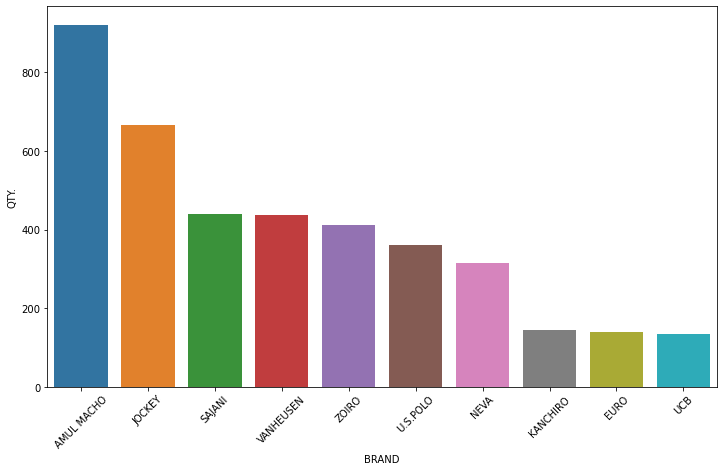

In [12]:
male_top_brand_df = df[(df['item_type']=='male')]
male_top_brand_df = male_top_brand_df.groupby('BRAND')[['QTY.','SALE AMT.']].sum().sort_values(by='QTY.',
                                                            ascending=False).head(10).reset_index()
plt.figure(figsize=(12,7))
sns.barplot(x='BRAND', y='QTY.', data=male_top_brand_df)
plt.xticks(rotation=45)

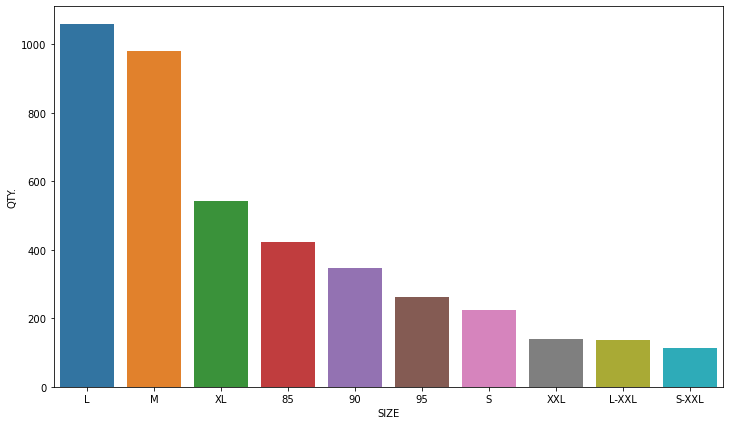

In [13]:
male_top_size_df = df[(df['item_type']=='male')]
male_top_size_df = male_top_size_df.groupby('SIZE')[['QTY.','SALE AMT.']].sum().sort_values(by='QTY.',
                                                            ascending=False).head(10).reset_index()
plt.figure(figsize=(12,7))
sns.barplot(x='SIZE', y='QTY.', data=male_top_size_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

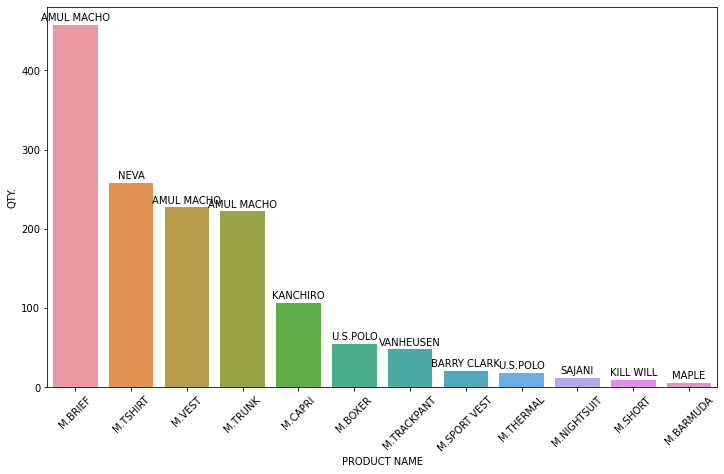

In [14]:
male_item_brand_df = df[(df['item_type']=='male')]
male_item_brand_df = male_item_brand_df.groupby(['BRAND','PRODUCT NAME'])[['QTY.','SALE AMT.']].sum(). \
                                sort_values(by='QTY.', ascending=False).reset_index()
male_item_brand_df = male_item_brand_df.groupby('PRODUCT NAME').first().sort_values(by='QTY.', 
                                ascending=False).reset_index()
rank = male_item_brand_df["SALE AMT."].argsort().argsort() 
plt.figure(figsize=(12,7))
g =sns.barplot(x='PRODUCT NAME', y='QTY.', data=male_item_brand_df)
for index, row in male_item_brand_df.iterrows():
    g.text(index, row['QTY.']+5, str(row['BRAND']), color='black', ha="center")
plt.xticks(rotation=45)

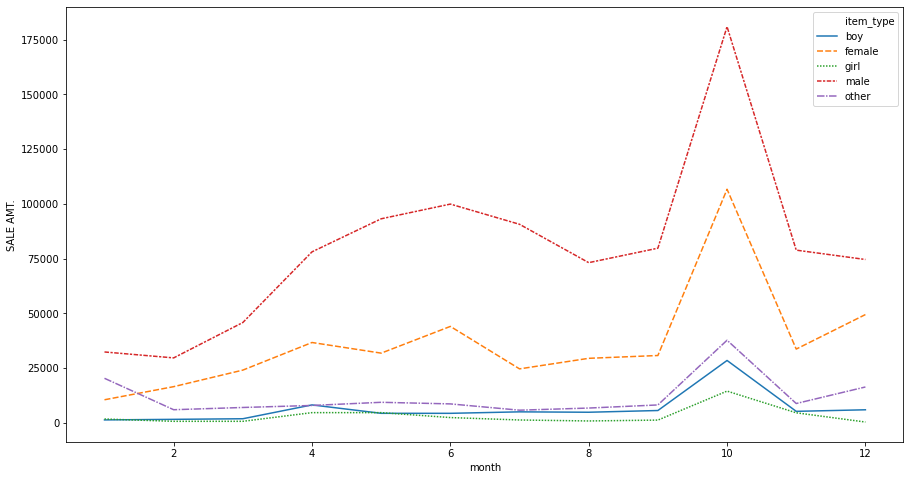

In [15]:
monthly_sales = df[(df['year']==2019)]
monthly_sales = monthly_sales.groupby(['month','item_type'])[['QTY.','SALE AMT.']].sum().reset_index()


plt.figure(figsize=(15,8))
sns.lineplot(x="month", y="SALE AMT.",
                     hue="item_type", style="item_type", data=monthly_sales)